# Part 1: Dipping your toes into Prefect
Let's gain visibility into our Python functions with Prefect! All we have to do for observability, scheduling, UI, and more, is to add a single @flow decorator. After that, we'll also create a deployment and view our flow runs and deployment in the Prefect UI. 

## First, we'll install Prefect

In [4]:
%%capture 
!pip install -U prefect
# The magic capture cmd simply suppresses the install output.

## Import code from my_first_script.py
We will import the function called `my_favorite_number` from `my_first_script.py`. The function has a `@flow` decorator on it, thus making it a `flow`. We will see what is so great about that in just moments!

In [15]:
# Importing my_favorite_number function w/ @flow decorator
from my_first_script import my_favorite_number
print("Imported my_favorite_number flow")

Imported my_favorite_number flow


## Run your flow!

In [6]:
my_favorite_number()

14:52:34.064 | INFO    | prefect.engine - Created flow run 'nano-goshawk' for flow 'my-favorite-number'
14:52:34.065 | INFO    | Flow run 'nano-goshawk' - Starting 'ConcurrentTaskRunner'; submitted tasks will be run concurrently...
14:52:34.169 | INFO    | Flow run 'nano-goshawk' - Some info about my_favorite_number...
14:52:34.182 | INFO    | Flow run 'nano-goshawk' - Finished in state Completed()


42

## Let's view your flow run in the UI
1. Copy this command: `prefect orion start`. This command will allow you to start an Orion server, enabling you to view your flow!
2. Visit the `Jupyter Home Page` tab that is already open in your browser. Click "New" in the right-hand corner and choose "Terminal". Paste the command you copied :)
2. Visit http://127.0.0.1:4200 to view your flow run and explore the UI.

# Part 2: Create a deployment in one command
Now that you have run a flow and viewed it in the UI, let's create a deployment. Deploying your flow means you no longer need to call the function, flow or .py file locally to run your code. With a single command, any script you write in Python can be executed regularly while enabling you to be notified of failures and observe the state of your jobs at all times.

Run the following command, which will build and apply a deployment:

In [10]:
%%bash
prefect deployment build my_first_script:my_favorite_number --name "First Flow Deployment" --apply --skip-upload

Found flow 'my-favorite-number'
Deployment YAML created at 
'/Users/bean/Documents/prefect-in-jupyter-notebook/my_favorite_number-deployment
.yaml'.
Deployment 'my-favorite-number/First Flow Deployment' successfully created with 
id 'db72b62a-8dd3-4002-9fb7-db6c281f368d'.

To execute flow runs from this deployment, start an agent that pulls work from 
the the 'default' work queue:
$ prefect agent start -q 'default'


We don't need to worry about starting an agent quite yet. For now, let's head on over to the UI to view our newly created deployment! Visit http://127.0.0.1:4200.

## Creating a flow run from your deployment in the UI

In the UI, take a look at the `Deployments` tab. Click on your new deployment (called `First Flow Deployment`). Then click the `Run` button in the top right (choose `Now with defaults`). This will create a 'flow run' from your deployment. You can view the flow run under the `Flow Runs` tab. 

## Execute flow runs from this deployment 
Starting a local agent will enable you to start the job you created in the last step. To do this, you simply need to:
1. Copy this command: `prefect agent start`.
2. Visit the `Jupyter Home Page` tab that is already open in your browser. Click "New" in the right-hand corner and choose "Terminal". Paste the command you copied and hit Enter. In the terminal, you should see that the agent picks up the flow run that you just created :)
3. Now when you look at the UI, in the Flow Runs tab you'll see the corresponding flow run name is marked as `Completed`.

## Have some fun
Experiment on your own in the UI by adding a description to your deployment, parameters, a schedule, and much more!

# Part 3. Run a more advanced flow
Take a look at `my_second_script.py`.
We will import the flow called `feeling_lucky`, which contains another flow (called a subflow) as well as tasks. Can Prefect handle it? You bet!

In [1]:
from my_second_script import feeling_lucky
print("Imported feeling_lucky flow")

Imported feeling_lucky flow


## Run your flow!

In [2]:
feeling_lucky()

15:07:43.571 | INFO    | prefect.engine - Created flow run 'pearl-cobra' for flow 'Feeling Lucky Flow'
15:07:43.719 | INFO    | Flow run 'pearl-cobra' - Created task run 'Get random number-ed263e6f-0' for task 'Get random number'
15:07:43.719 | INFO    | Flow run 'pearl-cobra' - Executing 'Get random number-ed263e6f-0' immediately...
15:07:43.745 | INFO    | Task run 'Get random number-ed263e6f-0' - Finished in state Completed()
15:07:43.779 | INFO    | Flow run 'pearl-cobra' - Created subflow run 'festive-mammoth' for flow 'Return game outcome message'
15:07:43.809 | INFO    | Flow run 'festive-mammoth' - Created task run 'Determine if player wins-e617d722-0' for task 'Determine if player wins'
15:07:43.810 | INFO    | Flow run 'festive-mammoth' - Executing 'Determine if player wins-e617d722-0' immediately...
15:07:43.836 | INFO    | Task run 'Determine if player wins-e617d722-0' - Finished in state Completed()
15:07:43.853 | INFO    | Flow run 'festive-mammoth' - Finished in state Co

You lost this round. Better luck next time.


[Completed(message=None, type=COMPLETED, result='lose')]

As you can see, with just an `@flow` decorator, we gain visibility into each task that gets run successfully, as well as each flow. But we can also view this in the UI! Head on over to http://127.0.0.1:4200 once more!

In the `Flow Runs` tab, filter the flows by `"Feeling Lucky Flow"`. We should see our flow listed. We can click the name of the flow run to view the logs and parameters, etc.

## Create a new deployment
Let's create a deployment for this flow as well. 

It's worth noting that we can create as many deployments as we like for a single flow. This could be useful in case we want multiple schedules or sets of parameters. You could run the command below several times, only changing the `--name` argument to generate several deployments with ease that you can further customize in the UI. 

In [3]:
%%bash
prefect deployment build my_second_script:feeling_lucky --name "Second Flow Deployment" --apply --skip-upload

Found flow 'Feeling Lucky Flow'
Deployment YAML created at 
'/Users/bean/Documents/prefect-in-jupyter-notebook/feeling_lucky-deployment.yaml
'.
Deployment 'Feeling Lucky Flow/Second Flow Deployment' successfully created with
id '6375aad3-47e4-4c12-a6da-8e1be2de14d0'.

To execute flow runs from this deployment, start an agent that pulls work from 
the the 'default' work queue:
$ prefect agent start -q 'default'


Click `Second Flow Deployment` in the `Deployments` tab and click `Run`. Then click "View Run" in the bottom right corner. Our local agent is running and so should run the flow immediately. 

## Other notes
You can view metadata about your flows and deployments by cd-ing into your orion.db: `open ~/.prefect/orion.db`. This will open a SQLite browser if one exists.

Alternatively, you can `rm -rf ~/.prefect/orion.db` if you would like to remove all of your existing flows, flow runs, and deployments that you created. If you only want to remove one flow, flow run, or deployment, I would recommend doing so through the UI. 

## Happy engineering!
We hope you were able to learn a little more about how Prefect works. Please see our docs to learn even more about the possibilities Prefect can give your workflows:
https://docs.prefect.io/

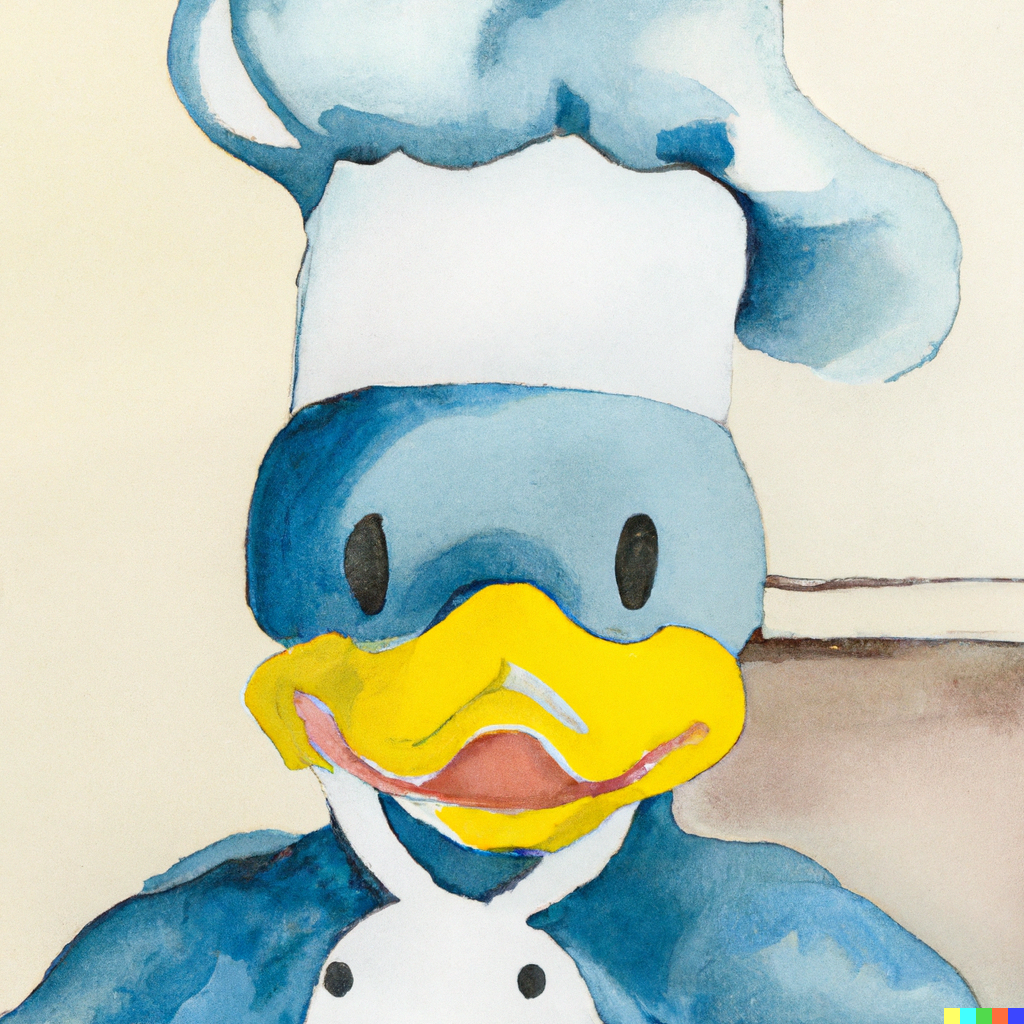

In [4]:
from IPython.display import Image
Image("img/marvin.png", width=300)